In [48]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(tidyverse) # metapackage of all tidyverse packages

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "expectancy-data"

In [49]:
library(tidyverse)
library(gridExtra)
library(car)

In [50]:
df <- read.csv("../input/expectancy-data/Life Expectancy Data.csv")

In [51]:
head(df)
str(df)


,Country,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Expenditure,Hepatitis_B,Measles,⋯,Total_Expenditure,Diphtheria,HIV.AIDS,GDP,Per_Capita_GDP,Population,Thinness_1.19_Years,Thinness_5.9_Years,Income_Composition_of_Resources,Schooling
,<fct>,<int>,<fct>,<dbl>,<int>,<int>,<dbl>,<dbl>,<int>,<int>,⋯,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65,1154,⋯,8.16,65,0.1,19907111419,578.47,34413603,17.2,17.3,0.479,10.1
2,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62,492,⋯,8.18,62,0.1,20484885120,613.86,33370794,17.5,17.5,0.476,10.0
3,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64,430,⋯,8.13,64,0.1,20561069558,637.17,32269589,17.7,17.7,0.470,9.9
4,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67,2787,⋯,8.52,67,0.1,20001598506,641.87,31161376,17.9,18.0,0.463,9.8
5,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68,3013,⋯,7.87,68,0.1,17804292964,591.16,30117413,18.2,18.2,0.454,9.5
6,Afghanistan,2010,Developing,58.8,279,74,0.01,79.679367,66,1989,⋯,9.20,66,0.1,15856574731,543.30,29185507,18.4,18.4,0.448,9.2


'data.frame':	2938 obs. of  23 variables:
 $ Country                        : Factor w/ 192 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                         : Factor w/ 2 levels "Developed","Developing": 2 2 2 2 2 2 2 2 2 2 ...
 $ Life_Expectancy                : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult_Mortality                : int  263 271 268 272 275 279 281 287 295 295 ...
 $ Infant_Deaths                  : int  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ Percentage_Expenditure         : num  71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis_B                    : int  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : int  1154 492 430 2787 3013 1989 2861 1599 1141 1990 ...
 $ BMI                            : num  19.1 18.6 18.1 17.6 17.2 16.7 16.

In [52]:
summary(df)

                Country          Year             Status     Life_Expectancy
 Switzerland        :  32   Min.   :2000   Developed : 512   Min.   :36.30  
 Afghanistan        :  16   1st Qu.:2004   Developing:2426   1st Qu.:63.10  
 Albania            :  16   Median :2008                     Median :72.10  
 Algeria            :  16   Mean   :2008                     Mean   :69.22  
 Angola             :  16   3rd Qu.:2012                     3rd Qu.:75.70  
 Antigua and Barbuda:  16   Max.   :2015                     Max.   :89.00  
 (Other)            :2826                                    NA's   :10     
 Adult_Mortality Infant_Deaths       Alcohol        Percentage_Expenditure
 Min.   :  1.0   Min.   :   0.0   Min.   : 0.0100   Min.   :    0.000     
 1st Qu.: 74.0   1st Qu.:   0.0   1st Qu.: 0.8775   1st Qu.:    4.685     
 Median :144.0   Median :   3.0   Median : 3.7550   Median :   64.913     
 Mean   :164.8   Mean   :  30.3   Mean   : 4.6029   Mean   :  738.251     
 3rd Qu.:

In [53]:
summary(df$Status)
table(as.numeric(df$Status))

Developed Developing 
       512       2426


   1    2 
 512 2426 

In [54]:
table(as.numeric(df$Year))
table(as.numeric(df$Country))
table(as.numeric(df$Status))


2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 
 183  183  183  183  183  183  183  183  183  183  183  183  183  193  183  183 


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16 
 21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40 
 16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16   1  16 
 41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60 
 16  16  16  16  16  16  16  16  16   1  16  16  16  16  16  16  16  16  16  16 
 61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80 
 16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16 
 81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99 100 
 16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16  16 
101 102 103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120 
 16  16  16  16  16   1  16  16  16  16   1  16  16  16  16  16  16   1  16  16 
121 122 123 124 125 126 127


   1    2 
 512 2426 

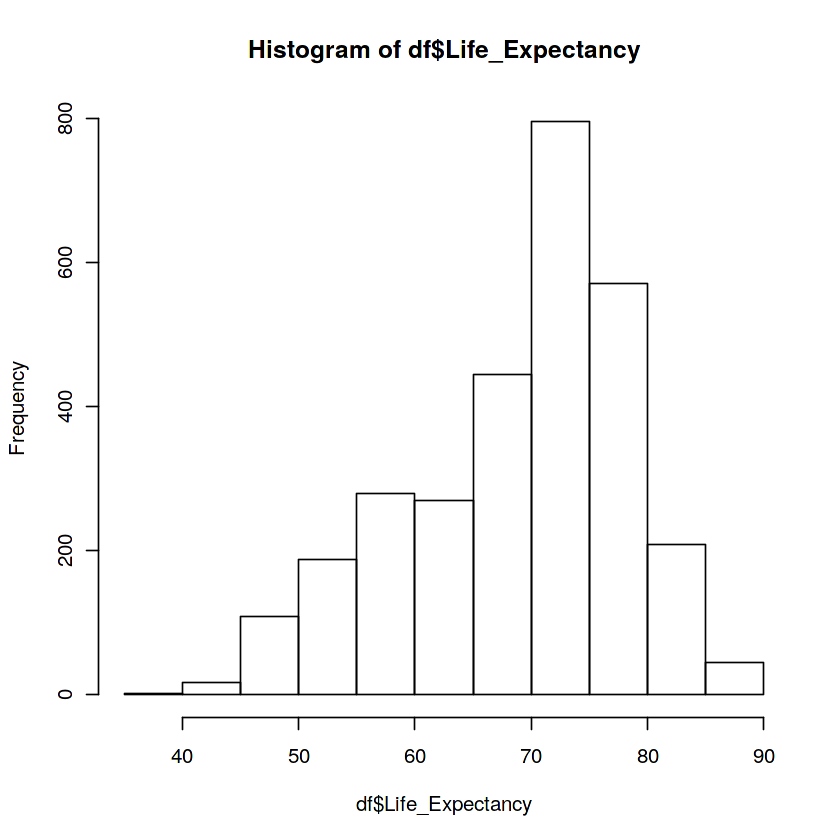

In [55]:
hist(df$Life_Expectancy)


In [56]:
str(df)

'data.frame':	2938 obs. of  23 variables:
 $ Country                        : Factor w/ 192 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ Year                           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
 $ Status                         : Factor w/ 2 levels "Developed","Developing": 2 2 2 2 2 2 2 2 2 2 ...
 $ Life_Expectancy                : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult_Mortality                : int  263 271 268 272 275 279 281 287 295 295 ...
 $ Infant_Deaths                  : int  62 64 66 69 71 74 77 80 82 84 ...
 $ Alcohol                        : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ Percentage_Expenditure         : num  71.3 73.5 73.2 78.2 7.1 ...
 $ Hepatitis_B                    : int  65 62 64 67 68 66 63 64 63 64 ...
 $ Measles                        : int  1154 492 430 2787 3013 1989 2861 1599 1141 1990 ...
 $ BMI                            : num  19.1 18.6 18.1 17.6 17.2 16.7 16.

In [57]:
FunctionUniqueCount=function(inpCol){
    return(length(unique(inpCol)))
}

In [58]:
sapply(df, FunctionUniqueCount)

Country                            Year 
                            192                              16 
                         Status                 Life_Expectancy 
                              2                             363 
                Adult_Mortality                   Infant_Deaths 
                            426                             209 
                        Alcohol          Percentage_Expenditure 
                           1077                            2328 
                    Hepatitis_B                         Measles 
                             88                             958 
                            BMI               Under.five_Deaths 
                            609                             252 
                          Polio               Total_Expenditure 
                             74                             819 
                     Diphtheria                        HIV.AIDS 
                             82                             200 
                            GDP                  Per_Capita_GDP 
                           2860                            2858 
                     Population             Thinness_1.19_Years 
                           2914                             201 
             Thinness_5.9_Years Income_Composition_of_Resources 
                            208                             626 
                      Schooling 
                            174

In [59]:
dim(df)

[1] 2938   23

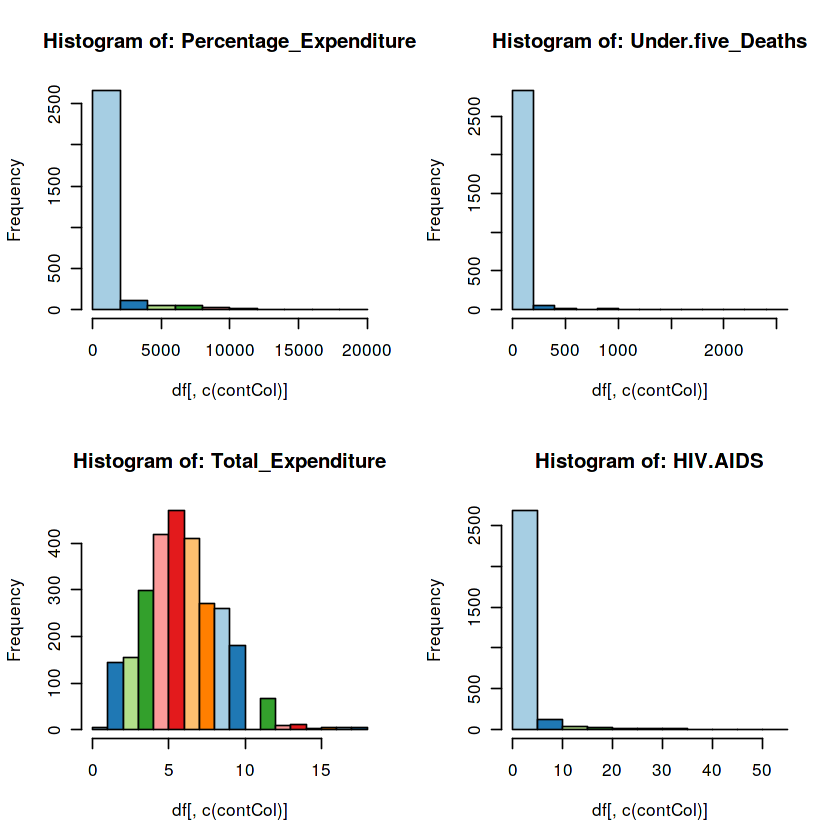

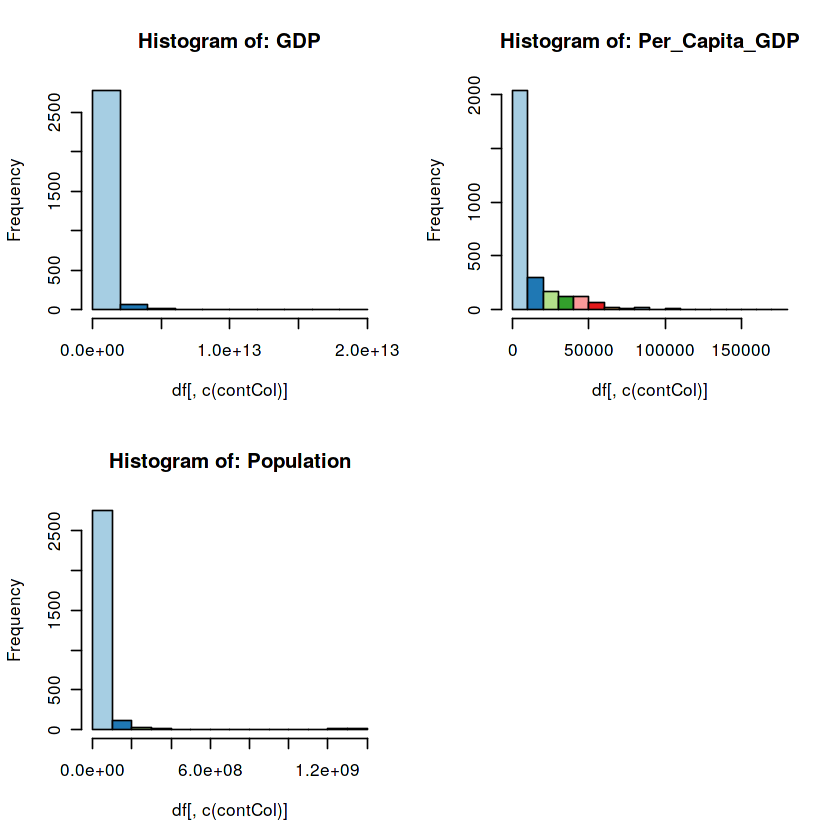

In [60]:
ColsForHist=c("Percentage_Expenditure","Under.five_Deaths","Total_Expenditure", "HIV.AIDS","GDP","Per_Capita_GDP","Population")
par(mfrow=c(2,2))
library(RColorBrewer)
for (contCol in ColsForHist){
    hist(df[,c(contCol)], main=paste('Histogram of:', contCol), 
    col=brewer.pal(8,"Paired"))
}


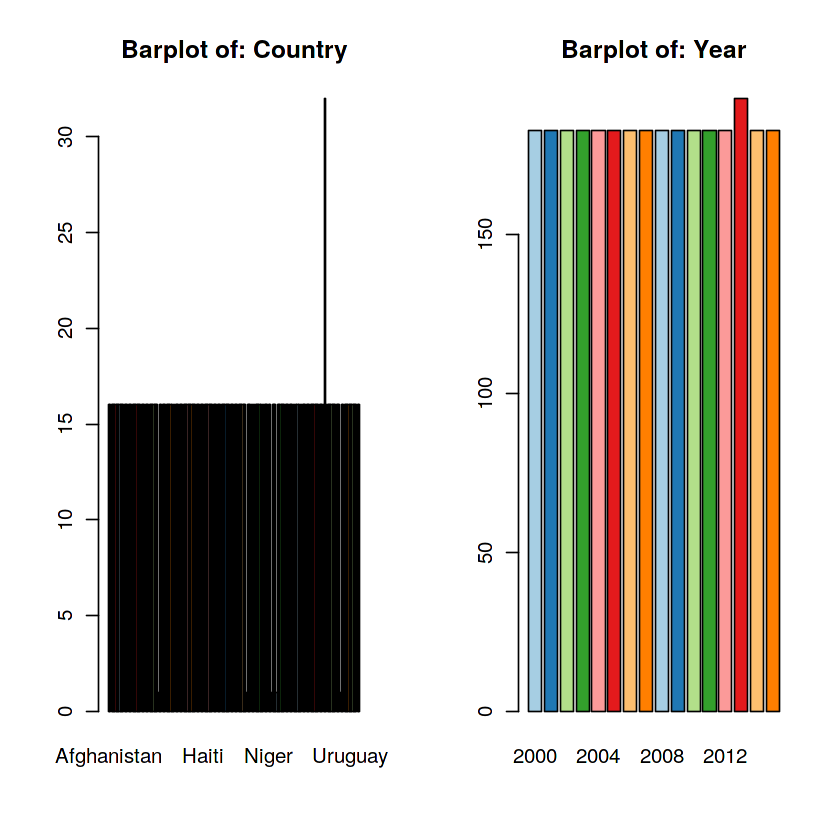

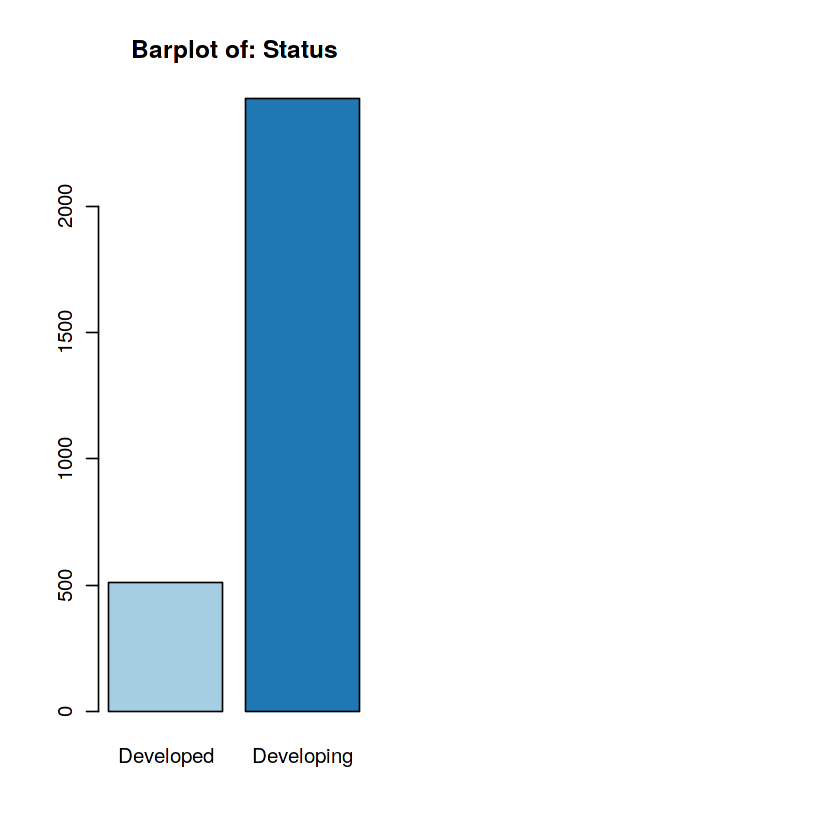

In [61]:
ColsForBar=c("Country","Year","Status")
par(mfrow=c(1,2))
for (catCol in ColsForBar){
    barplot(table(df[,c(catCol)]), main=paste('Barplot of:', catCol), 
    col=brewer.pal(8,"Paired"))
}

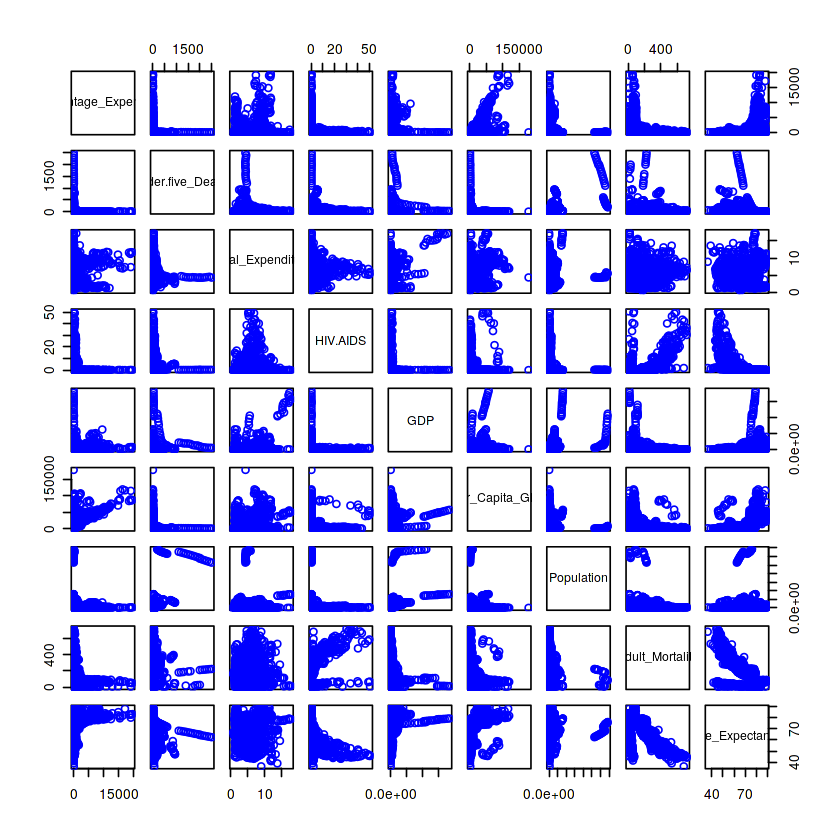

In [62]:
ContinuousCols=c("Percentage_Expenditure","Under.five_Deaths","Total_Expenditure", "HIV.AIDS","GDP","Per_Capita_GDP","Population","Adult_Mortality","Life_Expectancy")
plot(df[, ContinuousCols], col='blue')

In [63]:
#Correlation for multiple columns at once
ContinuousCols=c("Percentage_Expenditure","Under.five_Deaths","Total_Expenditure", "HIV.AIDS","GDP","Per_Capita_GDP",
                 "Population","Adult_Mortality","Life_Expectancy","Diphtheria","HIV.AIDS","Polio")
cor(df[, ContinuousCols], use = "complete.obs")

,Percentage_Expenditure,Under.five_Deaths,Total_Expenditure,HIV.AIDS,GDP,Per_Capita_GDP,Population,Adult_Mortality,Life_Expectancy,Diphtheria,HIV.AIDS.1,Polio
Percentage_Expenditure,1.00000000,-0.09202996,0.1761272303,-0.1061083453,0.10773114,0.67905733,-0.04768408,-0.24955981,0.39976774,0.14768672,-0.1061083453,0.15272708
Under.five_Deaths,-0.09202996,1.00000000,-0.1315812796,0.0357085566,0.05660403,-0.14275477,0.69375642,0.08923785,-0.22156380,-0.20103584,0.0357085566,-0.19329896
Total_Expenditure,0.17612723,-0.13158128,1.0000000000,-0.0009511017,0.28907546,0.22808347,-0.03375989,-0.11550098,0.21813692,0.15854502,-0.0009511017,0.14359852
HIV.AIDS,-0.10610835,0.03570856,-0.0009511017,1.0000000000,-0.06221381,-0.06025284,-0.04929098,0.53310442,-0.56991883,-0.17109166,1.0000000000,-0.16555392
GDP,0.10773114,0.05660403,0.2890754628,-0.0622138078,1.00000000,0.30091191,0.40254543,-0.15444030,0.21832435,0.11153386,-0.0622138078,0.08092820
Per_Capita_GDP,0.67905733,-0.14275477,0.2280834731,-0.0602528389,0.30091191,1.00000000,-0.04270579,-0.34296570,0.53131465,0.24952658,-0.0602528389,0.24669163
Population,-0.04768408,0.69375642,-0.0337598938,-0.0492909799,0.40254543,-0.04270579,1.00000000,-0.05619543,0.02032523,-0.00661086,-0.0492909799,-0.01297401
Adult_Mortality,-0.24955981,0.08923785,-0.1155009764,0.5331044230,-0.15444030,-0.34296570,-0.05619543,1.00000000,-0.68900589,-0.26654608,0.5331044230,-0.26446819
Life_Expectancy,0.39976774,-0.22156380,0.2181369175,-0.5699188319,0.21832435,0.53131465,0.02032523,-0.68900589,1.00000000,0.47100901,-0.5699188319,0.45548432
Diphtheria,0.14768672,-0.20103584,0.1585450205,-0.1710916553,0.11153386,0.24952658,-0.00661086,-0.26654608,0.47100901,1.00000000,-0.1710916553,0.66678595


In [64]:
CorrData=cor(df[, ContinuousCols], use = "complete.obs")
CorrData


,Percentage_Expenditure,Under.five_Deaths,Total_Expenditure,HIV.AIDS,GDP,Per_Capita_GDP,Population,Adult_Mortality,Life_Expectancy,Diphtheria,HIV.AIDS.1,Polio
Percentage_Expenditure,1.00000000,-0.09202996,0.1761272303,-0.1061083453,0.10773114,0.67905733,-0.04768408,-0.24955981,0.39976774,0.14768672,-0.1061083453,0.15272708
Under.five_Deaths,-0.09202996,1.00000000,-0.1315812796,0.0357085566,0.05660403,-0.14275477,0.69375642,0.08923785,-0.22156380,-0.20103584,0.0357085566,-0.19329896
Total_Expenditure,0.17612723,-0.13158128,1.0000000000,-0.0009511017,0.28907546,0.22808347,-0.03375989,-0.11550098,0.21813692,0.15854502,-0.0009511017,0.14359852
HIV.AIDS,-0.10610835,0.03570856,-0.0009511017,1.0000000000,-0.06221381,-0.06025284,-0.04929098,0.53310442,-0.56991883,-0.17109166,1.0000000000,-0.16555392
GDP,0.10773114,0.05660403,0.2890754628,-0.0622138078,1.00000000,0.30091191,0.40254543,-0.15444030,0.21832435,0.11153386,-0.0622138078,0.08092820
Per_Capita_GDP,0.67905733,-0.14275477,0.2280834731,-0.0602528389,0.30091191,1.00000000,-0.04270579,-0.34296570,0.53131465,0.24952658,-0.0602528389,0.24669163
Population,-0.04768408,0.69375642,-0.0337598938,-0.0492909799,0.40254543,-0.04270579,1.00000000,-0.05619543,0.02032523,-0.00661086,-0.0492909799,-0.01297401
Adult_Mortality,-0.24955981,0.08923785,-0.1155009764,0.5331044230,-0.15444030,-0.34296570,-0.05619543,1.00000000,-0.68900589,-0.26654608,0.5331044230,-0.26446819
Life_Expectancy,0.39976774,-0.22156380,0.2181369175,-0.5699188319,0.21832435,0.53131465,0.02032523,-0.68900589,1.00000000,0.47100901,-0.5699188319,0.45548432
Diphtheria,0.14768672,-0.20103584,0.1585450205,-0.1710916553,0.11153386,0.24952658,-0.00661086,-0.26654608,0.47100901,1.00000000,-0.1710916553,0.66678595


In [65]:
names(CorrData[,'Life_Expectancy'][abs(CorrData[,'Life_Expectancy'])>0.5])

[1] "HIV.AIDS"        "Per_Capita_GDP"  "Adult_Mortality" "Life_Expectancy"
[5] "HIV.AIDS.1"

In [66]:
ColsForANOVA=c("Country","Year","Status")
for (catCol in ColsForANOVA){
    anovaData= df[, c("Life_Expectancy", catCol)]
    print(str(anovaData))
    P_Value=summary(aov(Life_Expectancy~., data= anovaData))[[1]][[5]][1]
    print(paste('P-value for the test is:', P_Value))
}

'data.frame':	2938 obs. of  2 variables:
 $ Life_Expectancy: num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Country        : Factor w/ 192 levels "Afghanistan",..: 1 1 1 1 1 1 1 1 1 1 ...
NULL
[1] "P-value for the test is: 0"
'data.frame':	2938 obs. of  2 variables:
 $ Life_Expectancy: num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Year           : int  2015 2014 2013 2012 2011 2010 2009 2008 2007 2006 ...
NULL
[1] "P-value for the test is: 1.9642797530306e-20"
'data.frame':	2938 obs. of  2 variables:
 $ Life_Expectancy: num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Status         : Factor w/ 2 levels "Developed","Developing": 2 2 2 2 2 2 2 2 2 2 ...
NULL
[1] "P-value for the test is: 2.46508617000709e-170"


In [69]:
colSums(is.na(df))

Country                            Year 
                              0                               0 
                         Status                 Life_Expectancy 
                              0                               0 
                Adult_Mortality                   Infant_Deaths 
                              0                               0 
                        Alcohol          Percentage_Expenditure 
                              0                               0 
                    Hepatitis_B                         Measles 
                              0                               0 
                            BMI               Under.five_Deaths 
                              0                               0 
                          Polio               Total_Expenditure 
                              0                               0 
                     Diphtheria                        HIV.AIDS 
                              0                               0 
                            GDP                  Per_Capita_GDP 
                              0                               0 
                     Population             Thinness_1.19_Years 
                              0                               0 
             Thinness_5.9_Years Income_Composition_of_Resources 
                              0                               0 
                      Schooling 
                              0

In [68]:
NA_cols <- list("Life_Expectancy","Adult_Mortality","Alcohol","Hepatitis_B","BMI","Polio","Total_Expenditure",
           "Diphtheria","GDP","Per_Capita_GDP","Population","Thinness_1.19_Years","Thinness_5.9_Years",
           "Income_Composition_of_Resources","Schooling","HIV.AIDS")


df$Life_Expectancy[is.na(df$Life_Expectancy)] = median(df$Life_Expectancy,na.rm=TRUE)
df$Adult_Mortality[is.na(df$Adult_Mortality)] = median(df$Adult_Mortality,na.rm=TRUE)
df$Alcohol[is.na(df$Alcohol)] = median(df$Alcohol,na.rm=TRUE) 
df$Hepatitis_B[is.na(df$Hepatitis_B)] = median(df$Hepatitis_B,na.rm=TRUE) 
df$BMI[is.na(df$BMI)] = median(df$BMI,na.rm=TRUE) 
df$Polio[is.na(df$Polio)] = median(df$Polio,na.rm=TRUE) 
df$Total_Expenditure[is.na(df$Total_Expenditure)] = median(df$Total_Expenditure,na.rm=TRUE) 
df$Diphtheria[is.na(df$Diphtheria)] = median(df$Diphtheria,na.rm=TRUE)
df$GDP[is.na(df$GDP)] = median(df$GDP,na.rm=TRUE)
df$Per_Capita_GDP[is.na(df$Per_Capita_GDP)] = median(df$Per_Capita_GDP,na.rm=TRUE)
df$Population[is.na(df$Population)] = median(df$Population,na.rm=TRUE)
df$Thinness_1.19_Years[is.na(df$Thinness_1.19_Years)] = median(df$Thinness_1.19_Years,na.rm=TRUE)
df$Thinness_5.9_Years[is.na(df$Thinness_5.9_Years)] = median(df$Thinness_5.9_Years,na.rm=TRUE)
df$Income_Composition_of_Resources[is.na(df$Income_Composition_of_Resources)] = median(df$Income_Composition_of_Resources,na.rm=TRUE)
df$Schooling[is.na(df$Schooling)] = median(df$Schooling,na.rm=TRUE)


In [70]:
InputData=df 
TargetVariableName=c('Life_Expectancy')

In [102]:
BestPredictorName= c("Adult_Mortality","Alcohol","Hepatitis_B","BMI","Polio","Total_Expenditure",
           "GDP","Per_Capita_GDP","Population","HIV.AIDS")

In [103]:
TargetVariable=InputData[, c(TargetVariableName)]
str(TargetVariable)


 num [1:2938] 65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...


In [104]:
PredictorVariable=InputData[,BestPredictorName]
str(PredictorVariable)

'data.frame':	2938 obs. of  10 variables:
 $ Adult_Mortality  : num  263 271 268 272 275 279 281 287 295 295 ...
 $ Alcohol          : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ Hepatitis_B      : int  65 62 64 67 68 66 63 64 63 64 ...
 $ BMI              : num  19.1 18.6 18.1 17.6 17.2 16.7 16.2 15.7 15.2 14.7 ...
 $ Polio            : int  6 58 62 67 68 66 63 64 63 58 ...
 $ Total_Expenditure: num  8.16 8.18 8.13 8.52 7.87 9.2 9.42 8.33 6.73 7.43 ...
 $ GDP              : num  1.99e+10 2.05e+10 2.06e+10 2.00e+10 1.78e+10 ...
 $ Per_Capita_GDP   : num  578 614 637 642 591 ...
 $ Population       : num  34413603 33370794 32269589 31161376 30117413 ...
 $ HIV.AIDS         : num  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...


In [105]:
DataForML=data.frame(TargetVariable,PredictorVariable)
str(DataForML)
head(DataForML)

'data.frame':	2938 obs. of  11 variables:
 $ TargetVariable   : num  65 59.9 59.9 59.5 59.2 58.8 58.6 58.1 57.5 57.3 ...
 $ Adult_Mortality  : num  263 271 268 272 275 279 281 287 295 295 ...
 $ Alcohol          : num  0.01 0.01 0.01 0.01 0.01 0.01 0.01 0.03 0.02 0.03 ...
 $ Hepatitis_B      : int  65 62 64 67 68 66 63 64 63 64 ...
 $ BMI              : num  19.1 18.6 18.1 17.6 17.2 16.7 16.2 15.7 15.2 14.7 ...
 $ Polio            : int  6 58 62 67 68 66 63 64 63 58 ...
 $ Total_Expenditure: num  8.16 8.18 8.13 8.52 7.87 9.2 9.42 8.33 6.73 7.43 ...
 $ GDP              : num  1.99e+10 2.05e+10 2.06e+10 2.00e+10 1.78e+10 ...
 $ Per_Capita_GDP   : num  578 614 637 642 591 ...
 $ Population       : num  34413603 33370794 32269589 31161376 30117413 ...
 $ HIV.AIDS         : num  0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 ...


,TargetVariable,Adult_Mortality,Alcohol,Hepatitis_B,BMI,Polio,Total_Expenditure,GDP,Per_Capita_GDP,Population,HIV.AIDS
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,65.0,263,0.01,65,19.1,6,8.16,19907111419,578.47,34413603,0.1
2,59.9,271,0.01,62,18.6,58,8.18,20484885120,613.86,33370794,0.1
3,59.9,268,0.01,64,18.1,62,8.13,20561069558,637.17,32269589,0.1
4,59.5,272,0.01,67,17.6,67,8.52,20001598506,641.87,31161376,0.1
5,59.2,275,0.01,68,17.2,68,7.87,17804292964,591.16,30117413,0.1
6,58.8,279,0.01,66,16.7,66,9.20,15856574731,543.30,29185507,0.1


In [106]:
TrainingSampleIndex=sample(1:nrow(DataForML), size=0.7 * nrow(DataForML) )
DataForMLTrain=DataForML[TrainingSampleIndex, ]
DataForMLTest=DataForML[-TrainingSampleIndex, ]
dim(DataForMLTrain)
dim(DataForMLTest)

[1] 2056   11

[1] 882  11


Call:
lm(formula = TargetVariable ~ ., data = DataForMLTrain)

Residuals:
     Min       1Q   Median       3Q      Max 
-25.2695  -2.4441   0.2133   2.7709  17.0623 

Coefficients:
                    Estimate Std. Error t value Pr(>|t|)    
(Intercept)        6.138e+01  6.172e-01  99.463  < 2e-16 ***
Adult_Mortality   -2.214e-02  1.109e-03 -19.959  < 2e-16 ***
Alcohol            2.918e-01  3.093e-02   9.434  < 2e-16 ***
Hepatitis_B       -1.393e-02  4.969e-03  -2.804  0.00509 ** 
BMI                9.635e-02  6.185e-03  15.577  < 2e-16 ***
Polio              8.252e-02  5.232e-03  15.771  < 2e-16 ***
Total_Expenditure  4.917e-02  4.839e-02   1.016  0.30967    
GDP                3.322e-14  9.844e-14   0.338  0.73577    
Per_Capita_GDP     1.303e-04  7.238e-06  18.003  < 2e-16 ***
Population         1.660e-09  8.819e-10   1.882  0.05992 .  
HIV.AIDS          -5.766e-01  2.485e-02 -23.202  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard 

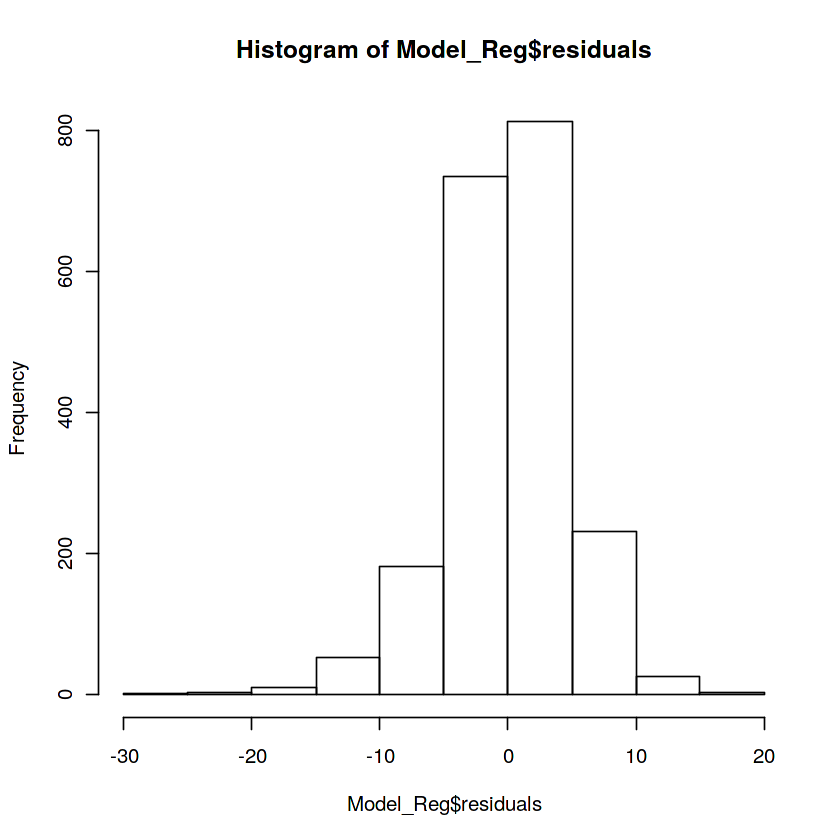

In [107]:
Model_Reg=lm(TargetVariable~.,data=DataForMLTrain)
summary(Model_Reg)
hist(Model_Reg$residuals)

In [128]:
coeffs <- coefficients(Model_Reg)

In [129]:
coeffs

(Intercept)   Adult_Mortality           Alcohol       Hepatitis_B 
     6.138412e+01     -2.213817e-02      2.918034e-01     -1.393275e-02 
              BMI             Polio Total_Expenditure               GDP 
     9.634612e-02      8.251503e-02      4.916973e-02      3.322348e-14 
   Per_Capita_GDP        Population          HIV.AIDS 
     1.303093e-04      1.660187e-09     -5.766060e-01

In [108]:
car::vif(Model_Reg)

Adult_Mortality           Alcohol       Hepatitis_B               BMI 
         1.712344          1.321886          1.187634          1.380245 
            Polio Total_Expenditure               GDP    Per_Capita_GDP 
         1.327977          1.216561          1.461788          1.464672 
       Population          HIV.AIDS 
         1.299123          1.452873

Removed columns after checking multicolinearity :-"Diphtheria","Thinness_1.19_Years","Thinness_5.9_Years","Income_Composition_of_Resources","Schooling"

In [109]:
DataForMLTest$Pred_LM=predict(Model_Reg, DataForMLTest)
tail(DataForMLTest)

,TargetVariable,Adult_Mortality,Alcohol,Hepatitis_B,BMI,Polio,Total_Expenditure,GDP,Per_Capita_GDP,Population,HIV.AIDS,Pred_LM
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2916,58.0,526,2.25,81,18.8,83,6.11,12756858899,1047.92,12173514,15.9,49.21708
2918,47.9,578,2.46,92,18.0,84,7.33,6221077675,538.59,11550642,17.6,46.99149
2927,54.9,464,6.00,94,29.9,93,6.31,14101920300,1093.65,12894316,13.3,54.91359
2932,45.4,7,4.57,68,27.9,71,5.12,5443896500,447.85,12155491,26.8,55.03932
2933,44.6,717,4.14,65,27.5,69,6.44,5755215200,476.56,12076699,30.3,37.08438
2938,46.0,665,1.68,79,25.5,78,7.10,6689957600,563.06,11881477,43.5,30.30484


In [110]:
LM_APE= 100 *(abs(DataForMLTest$Pred_LM - DataForMLTest$TargetVariable)/DataForMLTest$TargetVariable)

print(paste('### Mean Accuracy of Linear Regression Model is: ', 100 - mean(LM_APE)))
print(paste('### Median Accuracy of Linear Regression Model is: ', 100 - median(LM_APE)))


[1] "### Mean Accuracy of Linear Regression Model is:  94.5538277360522"
[1] "### Median Accuracy of Linear Regression Model is:  96.0721827062729"


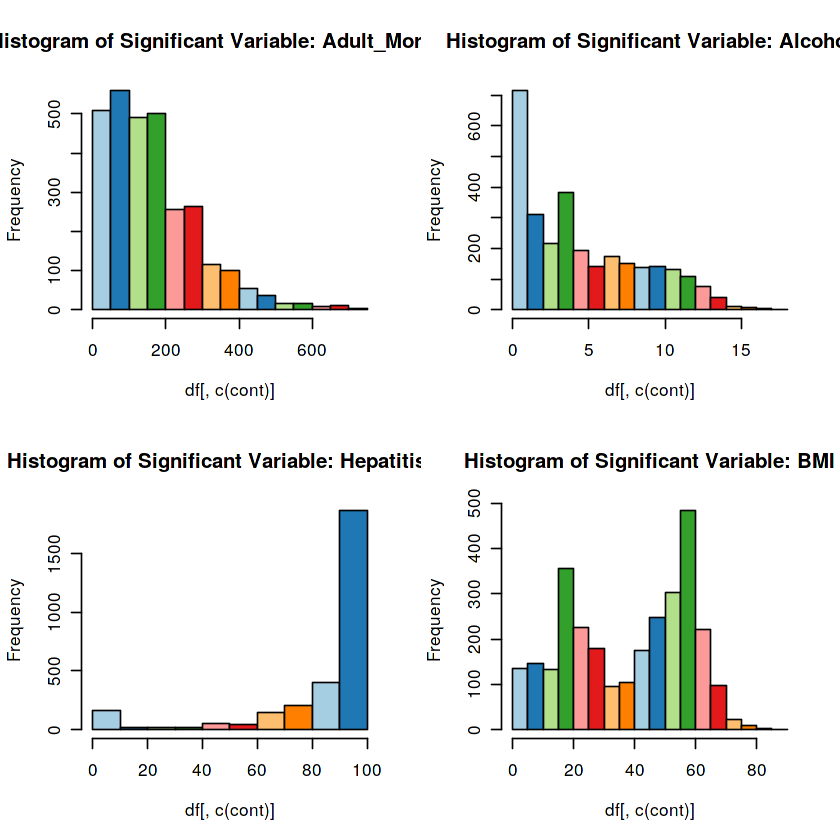

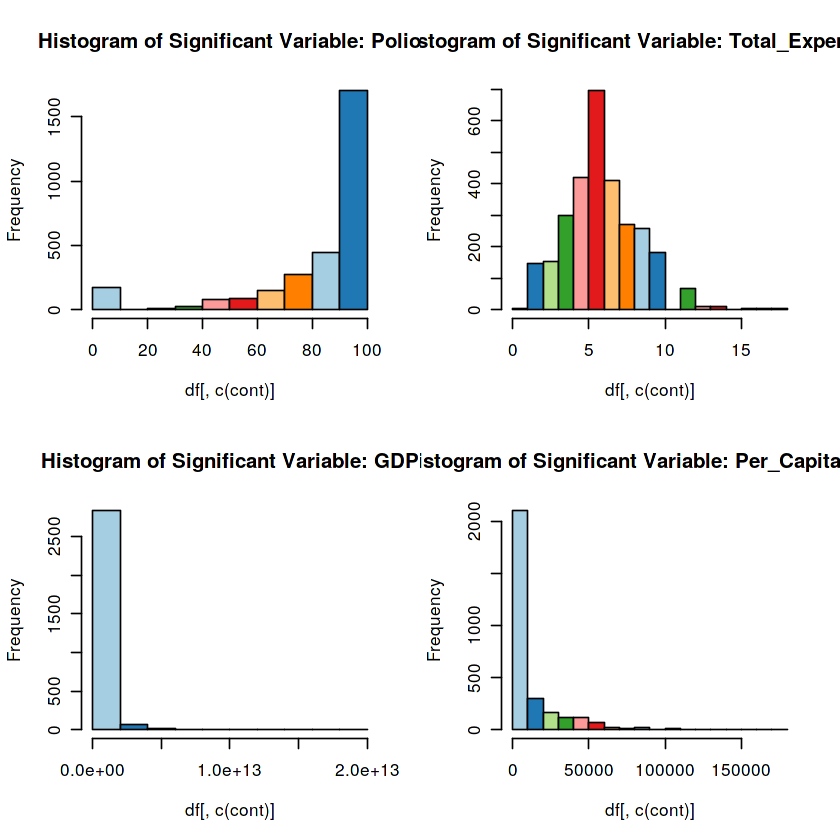

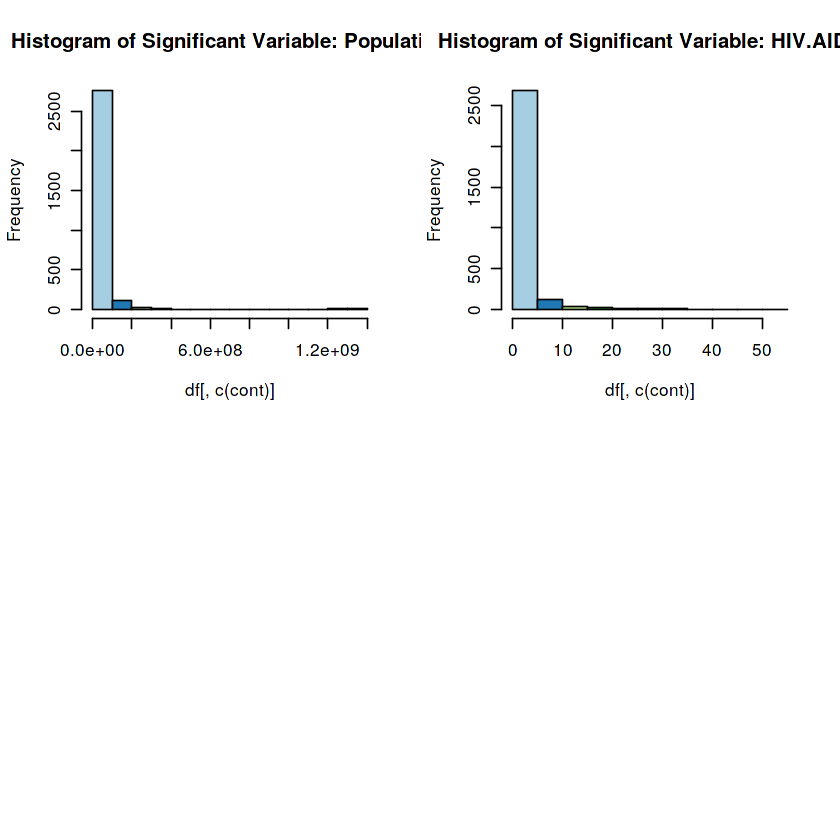

In [140]:
par(mfrow=c(2,2))
library(RColorBrewer)
for (cont in BestPredictorName){
hist(df[,c(cont)], main=paste('Histogram of Significant Variable:', cont), 
col=brewer.pal(8,"Paired"))
}


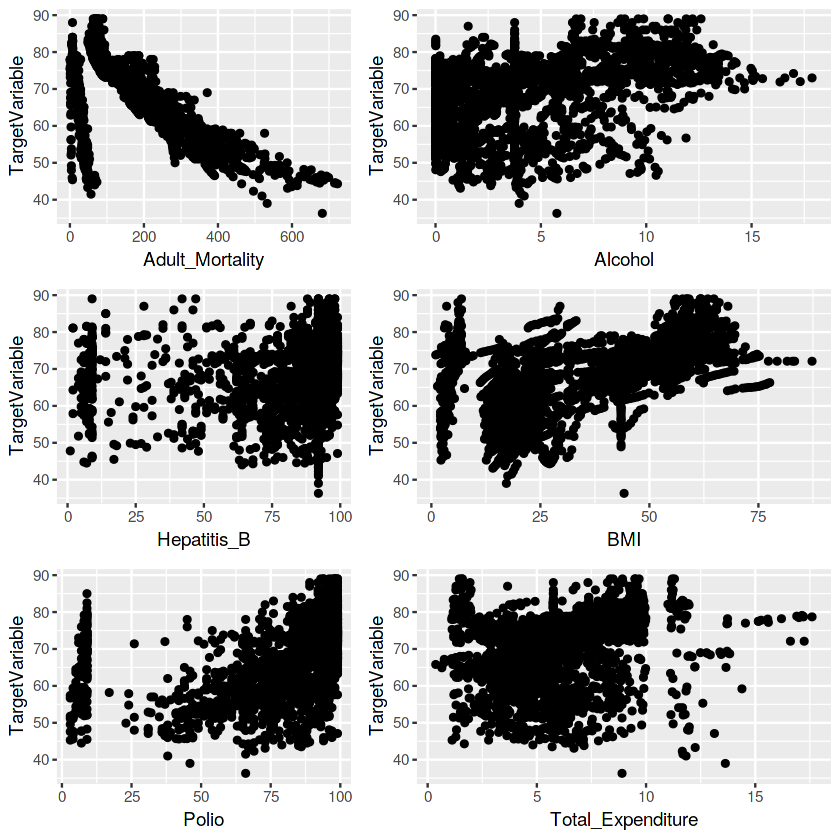

In [162]:
p1 <- ggplot(df) + geom_point(aes(x =Adult_Mortality,y = TargetVariable)) 
p2 <- ggplot(df) + geom_point(aes(x =Alcohol,y = TargetVariable)) 
p3 <- ggplot(df) + geom_point(aes(x =Hepatitis_B,y = TargetVariable)) 
p4 <- ggplot(df) + geom_point(aes(x =BMI,y = TargetVariable)) 
p5 <- ggplot(df) + geom_point(aes(x =Polio,y = TargetVariable)) 
p6 <- ggplot(df) + geom_point(aes(x =Total_Expenditure,y = TargetVariable))

grid.arrange(p1, p2,p3,p4,p5,p6 ,widths = c(1.5,2))

##heteroscedasticity Test 

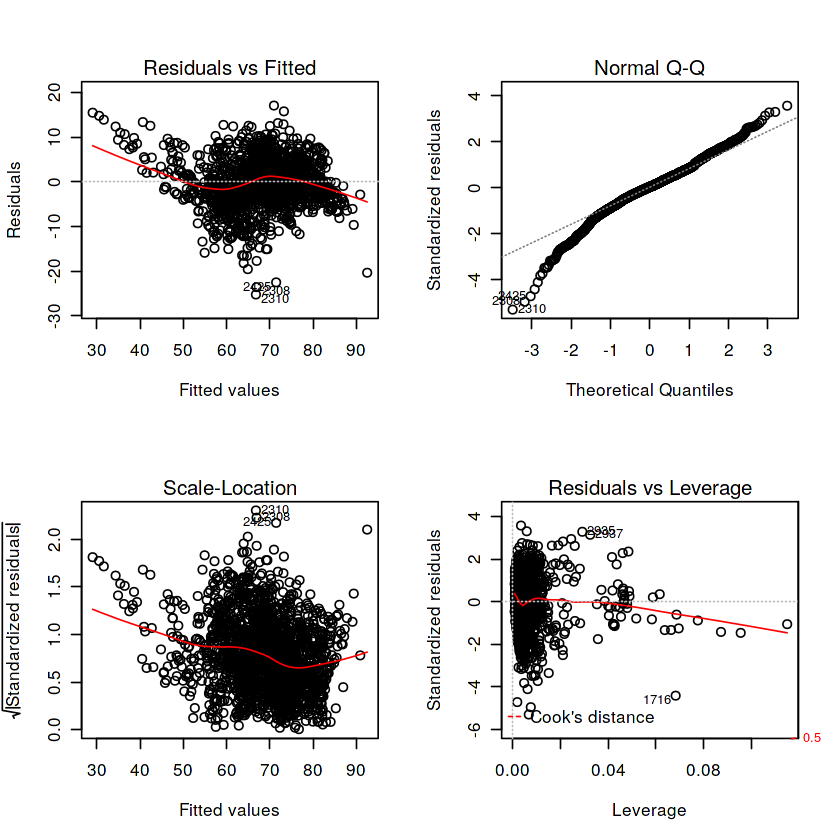

In [111]:
lm_hetro <- lm(TargetVariable~.,data=DataForMLTrain)
par(mfrow=c(2,2)) 
plot(lm_hetro)

In [112]:
lmtest::bptest(lm_hetro)


	studentized Breusch-Pagan test

data:  lm_hetro
BP = 378.04, df = 10, p-value < 2.2e-16


these test have a p-value less that a significance level of 0.05, therefore we can reject the null hypothesis that the variance of the residuals is constant and infer that heteroscedasticity is indeed present, thereby confirming our graphical inference.

In [121]:
install.packages('nortest')
library(nortest)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [126]:
X <- as.vector(t(DataForML))
ad.test(X)


	Anderson-Darling normality test

data:  X
A = 11621, p-value < 2.2e-16


As our p-value for the test is below our significance level  then we can reject the null hypothesis and conclude that we have sufficient evidence to say our data does not follow a normal distribution.